<a href="https://colab.research.google.com/github/Omo-Tines/Ideal-Number-Classification-ML/blob/main/FinalMLlab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OLASENI TOWOBOLA 30812022
#MACHINE LEARNING LAB 1

In [ ]:
#installing packages
!pip install -Uqq fastbook
!pip install fastai --upgrade
import fastbook
fastbook.setup_book()

In [ ]:
#importing the various libraries needed
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

#This downloads the MNIST dataset

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
Path.BASE_PATH = path

#Viewing the various paths in the dataset

In [ ]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [ ]:
(path/'training').ls()

(#10) [Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9'),Path('training/5'),Path('training/4'),Path('training/2'),Path('training/0'),Path('training/1'),Path('training/3')]

#Selecting 1 3 7 8
#splitting the data into training and validation 80-20

In [ ]:
ones = (path/'training'/'1').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()

t_size=0.8 #because its 80%

one_train = ones[:int(len(ones)*t_size)]
one_valid = ones[int(len(ones)*t_size):]

three_train = threes[:int(len(threes)*t_size)]
three_valid = threes[int(len(threes)*t_size):]

seven_train = sevens[:int(len(sevens)*t_size)]
seven_valid = sevens[int(len(sevens)*t_size):]

eight_train = eights[:int(len(eights)*t_size)]
eight_valid = eights[int(len(eights)*t_size):]



#Creating tensors for the training and validation datasets

In [ ]:
#training tensors
onetr_tensors = [tensor(Image.open(o)) for o in one_train]
threetr_tensors = [tensor(Image.open(o)) for o in three_train]
seventr_tensors = [tensor(Image.open(o)) for o in seven_train]
eighttr_tensors = [tensor(Image.open(o)) for o in eight_train]
len(onetr_tensors),len(threetr_tensors),len(seventr_tensors),len(eighttr_tensors)

(5393, 4904, 5012, 4680)

In [ ]:
#valid tensors
onev_tensors = [tensor(Image.open(o)) for o in one_valid]
threev_tensors = [tensor(Image.open(o)) for o in three_valid]
sevenv_tensors = [tensor(Image.open(o)) for o in seven_valid]
eightv_tensors = [tensor(Image.open(o)) for o in eight_valid]
len(onev_tensors),len(threev_tensors),len(sevenv_tensors),len(eightv_tensors)

(1349, 1227, 1253, 1171)

#Validation set

In [ ]:
# Create joint validation set
valid_set = three_valid + eight_valid + one_valid + seven_valid
# Shuffle validation set
random.shuffle (valid_set)
# Create label set
label = []
for i in valid_set:
  i_label_str =  str(i).split("/")[-2]
  i_label = int (i_label_str)
  label.append (i_label)

# Create label tensor
label_tensor = [tensor (x) for x in label]
label_tensor

[tensor(1),
 tensor(8),
 tensor(8),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(7),
 tensor(8),
 tensor(7),
 tensor(1),
 tensor(3),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(3),
 tensor(8),
 tensor(8),
 tensor(8),
 tensor(1),
 tensor(8),
 tensor(3),
 tensor(3),
 tensor(3),
 tensor(8),
 tensor(3),
 tensor(7),
 tensor(3),
 tensor(1),
 tensor(3),
 tensor(3),
 tensor(1),
 tensor(8),
 tensor(3),
 tensor(3),
 tensor(7),
 tensor(3),
 tensor(7),
 tensor(1),
 tensor(7),
 tensor(3),
 tensor(8),
 tensor(1),
 tensor(7),
 tensor(7),
 tensor(8),
 tensor(1),
 tensor(7),
 tensor(7),
 tensor(1),
 tensor(3),
 tensor(7),
 tensor(3),
 tensor(8),
 tensor(3),
 tensor(1),
 tensor(3),
 tensor(1),
 tensor(3),
 tensor(1),
 tensor(8),
 tensor(8),
 tensor(1),
 tensor(7),
 tensor(7),
 tensor(1),
 tensor(3),
 tensor(3),
 tensor(7),
 tensor(1),
 tensor(8),
 tensor(7),
 tensor(8),
 tensor(7),
 tensor(8),
 tensor(8),
 tensor(1),
 tensor(7),
 tensor(8),
 tensor(8),
 tensor(3),
 tensor(7),
 tensor(3),
 tensor(7),
 ten

In [ ]:
#stacked validation
valid_tens = [tensor(Image.open(o)) for o in valid_set]
stacked_valid_set = torch.stack(valid_tens).float()/255

In [ ]:
#STACKED training
stacked_trainones = torch.stack(onetr_tensors).float()/255
stacked_trainthrees = torch.stack(threetr_tensors).float()/255
stacked_trainsevens = torch.stack(seventr_tensors).float()/255
stacked_traineights = torch.stack(eighttr_tensors).float()/255

In [ ]:
stacked_trainones.ndim

3

In [ ]:
stacked_trainthrees.ndim

3

In [ ]:
stacked_trainsevens.ndim

3

In [ ]:
stacked_traineights.ndim

3

#getting the ideal image of each digit

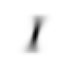

In [ ]:
ideal1= stacked_trainones.mean(0)
show_image(ideal1);

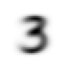

In [ ]:
ideal3= stacked_trainthrees.mean(0)
show_image(ideal3);

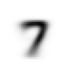

In [ ]:
ideal7= stacked_trainsevens.mean(0)
show_image(ideal7);

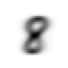

In [ ]:
ideal8= stacked_traineights.mean(0)
show_image(ideal8);

#Writing the classifier function

In [ ]:
def mnist_dist(a,b) : return (a-b).abs().mean((-1,-2))

In [ ]:
# Returns a tensor of predictions
def is_num (x,y):
  dist_3 = mnist_dist (x, ideal3)
  dist_8 = mnist_dist (x, ideal8)
  dist_1 = mnist_dist (x, ideal1)
  dist_7 = mnist_dist (x, ideal7)

  is_3 = torch.logical_and (torch.logical_and ((dist_3 < dist_8), (dist_3 < dist_1)), (dist_3 < dist_7))
  is_8 = torch.logical_and (torch. logical_and ((dist_8< dist_3), (dist_8 < dist_1)), (dist_8 < dist_7))
  is_1 = torch.logical_and (torch.logical_and ((dist_1 < dist_3), (dist_1< dist_8)), (dist_1 < dist_7))
  is_7 = torch.logical_and(torch.logical_and ((dist_7 < dist_8), (dist_7 < dist_1)), (dist_7 < dist_3))

  result = []
  for i in range(len(y)):
    if(is_3[i].item() == True ): result.append(3)
    elif(is_8[i].item() == True) : result.append(8)
    elif(is_1[i].item() == True): result.append (1)
    elif(is_7[i].item() == True) : result.append (7)
  return result

def accuracy(a,b):
  pixsim_tens = torch.eq(a, b)
  accuracy = pixsim_tens.float().mean().item()
  return round(accuracy * 100, 2)



#testing the classifier on the validation set and finding its accuracy


In [ ]:
results = is_num(stacked_valid_set, stacked_valid_set)
result_tens = [tensor(result) for result in results]

# Create result and label tensor stacks
label_stack = torch.stack(label_tensor)
result_stack = torch.stack(result_tens)

# Calculate accuracy
accuracy(result_stack, label_stack)

73.08

#Test set

In [ ]:
t_ones = (path/'testing'/'1').ls().sorted()
t_threes = (path/'testing'/'3').ls().sorted()
t_sevens = (path/'testing'/'7').ls().sorted()
t_eights = (path/'testing'/'8').ls().sorted()

# Create joint test set
test_set = t_threes + t_eights + t_ones + t_sevens

# Shuffle test set
random.shuffle(test_set)

# Create label set
test_label = []
for t in test_set:
  test_label_str = str(t).split("/")[-2]
  t_label = int(test_label_str)
  test_label.append(t_label)

# Create test label tensor
test_label_tensor = [tensor(x) for x in test_label]

# Create test tensor
test_tensor = [tensor(Image.open(t)) for t in test_set]
stack_test = torch.stack(test_tensor).float()/255


#tensor testing set
test_one_tensors = [tensor(Image.open(o)) for o in t_ones]
test_three_tensors = [tensor(Image.open(o)) for o in t_threes]
test_seven_tensors = [tensor(Image.open(o)) for o in t_sevens]
test_eight_tensors = [tensor(Image.open(o)) for o in t_eights]

len(test_one_tensors),len(test_three_tensors),len(test_seven_tensors),len(test_eight_tensors)

(1135, 1010, 1028, 974)

#running the classsifer on the test set and finding the accuracy

In [ ]:
# Predict with test set
test_result = is_num(stack_test, stack_test)
test_result_tens = [tensor(result) for result in test_result]

# Create prediction and label tensor stacks
testlabel_tens_stack = torch.stack(test_label_tensor)
test_result_tens_stack = torch.stack(test_result_tens)

# Calculate accuracy
accuracy(test_result_tens_stack, testlabel_tens_stack)

73.38